In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import ttest_ind
import plotly as py
import plotly.graph_objs as go

In [95]:
ventas = pd.read_table('src/data/Global Superstore.txt')
ventas

,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [96]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order Date      51290 non-null  object 
 9   Order ID        51290 non-null  object 
 10  Order Priority  51290 non-null  object 
 11  Product ID      51290 non-null  object 
 12  Product Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [97]:
ventas.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name',
       'Discount', 'Market', '记录数', 'Order Date', 'Order ID', 'Order Priority',
       'Product ID', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row ID',
       'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'Shipping Cost', 'State',
       'Sub-Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [98]:
ventas.drop(columns = '记录数', inplace = True)

In [99]:
ventas.columns = [x.lower() for x in ventas.columns]

In [100]:
ventas.columns = [x.replace(' ','_') for x in ventas.columns]

In [101]:
ventas.rename(columns={'sub-category': 'sub_category'}, inplace=True)

In [102]:
ventas

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,CA-2014-109701,High,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,2014-12-03 00:00:00.000,CA-2014-109701,High,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,2014-12-18 00:00:00.000,CA-2014-106964,Medium,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,2014-12-25 00:00:00.000,CA-2014-145219,Critical,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [103]:
ventas.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

<Axes: xlabel='quantity'>

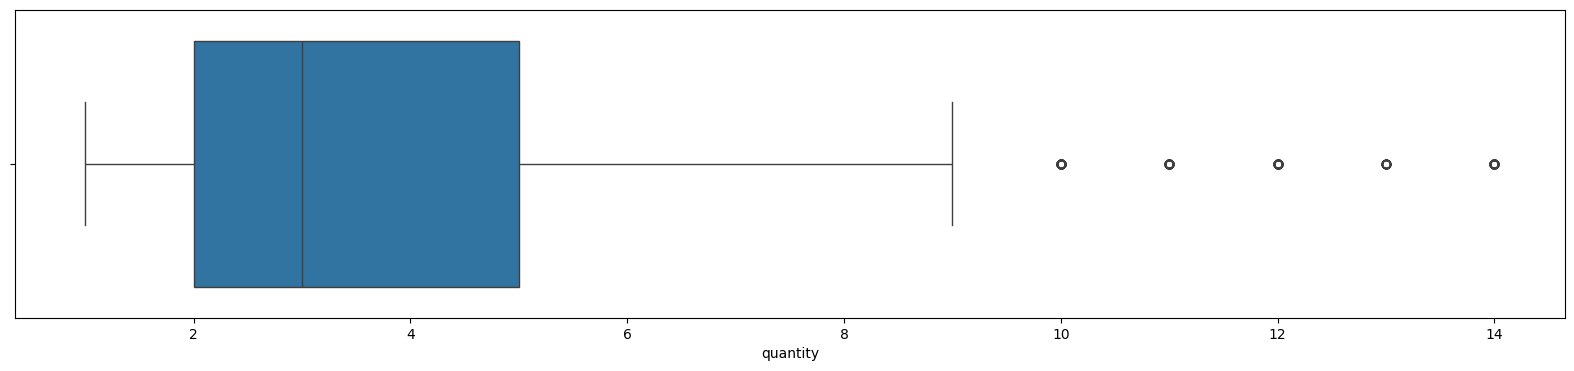

In [104]:
#Identificamos outliers
plt.figure(figsize=(20,4))
sns.boxplot(ventas[ventas['year'] == 2014]['quantity'], orient='h')

In [105]:
ventas.groupby(['quantity'])['product_name'].count()

quantity
1      8963
2     12748
3      9682
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
11      156
12      176
13       83
14      186
Name: product_name, dtype: int64

<Axes: xlabel='sales'>

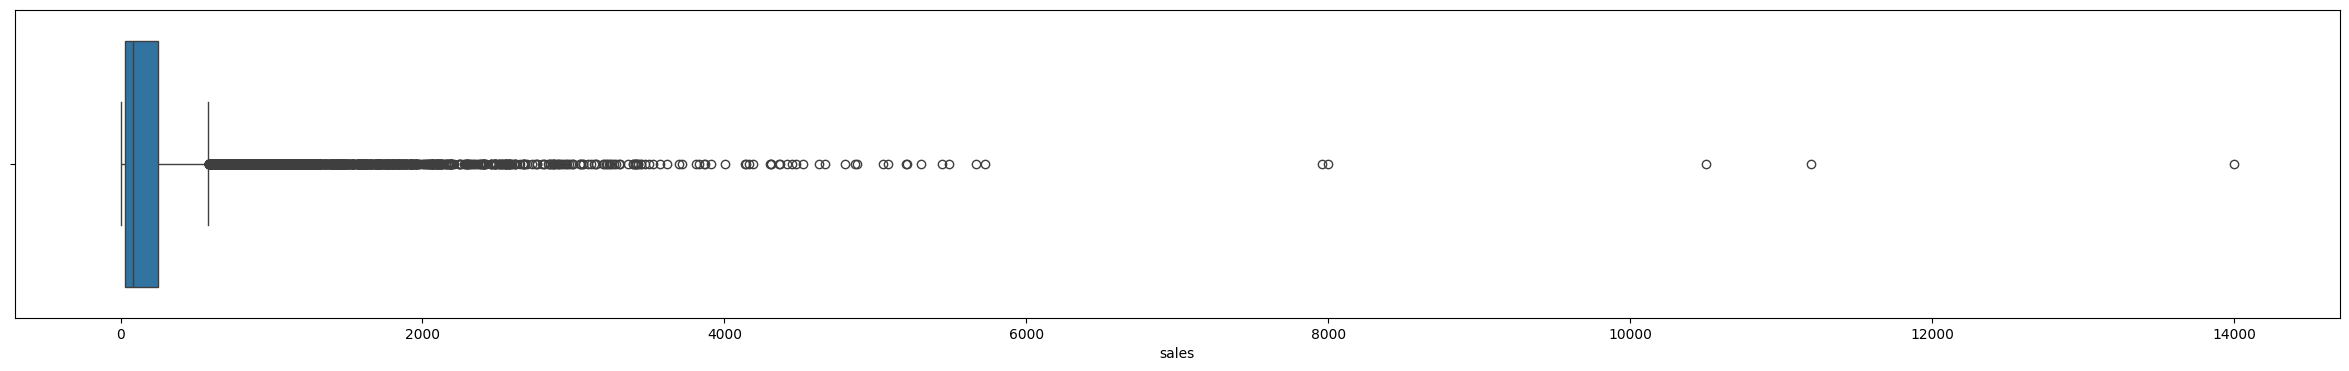

In [106]:
plt.figure(figsize=(30,4))
sns.boxplot(ventas[ventas['year'] == 2014]['sales'], orient='h')

<Axes: xlabel='sales'>

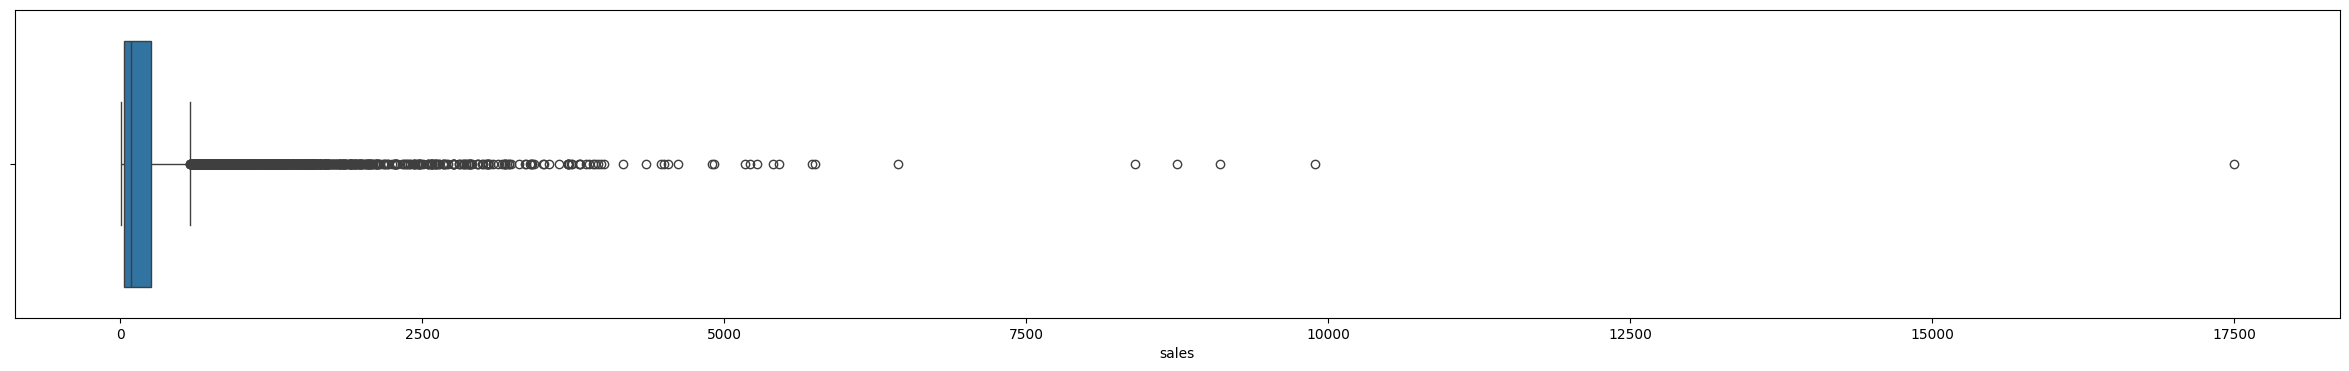

In [107]:
plt.figure(figsize=(30,4))
sns.boxplot(ventas[ventas['year'] == 2013]['sales'], orient='h')

<Axes: xlabel='sales'>

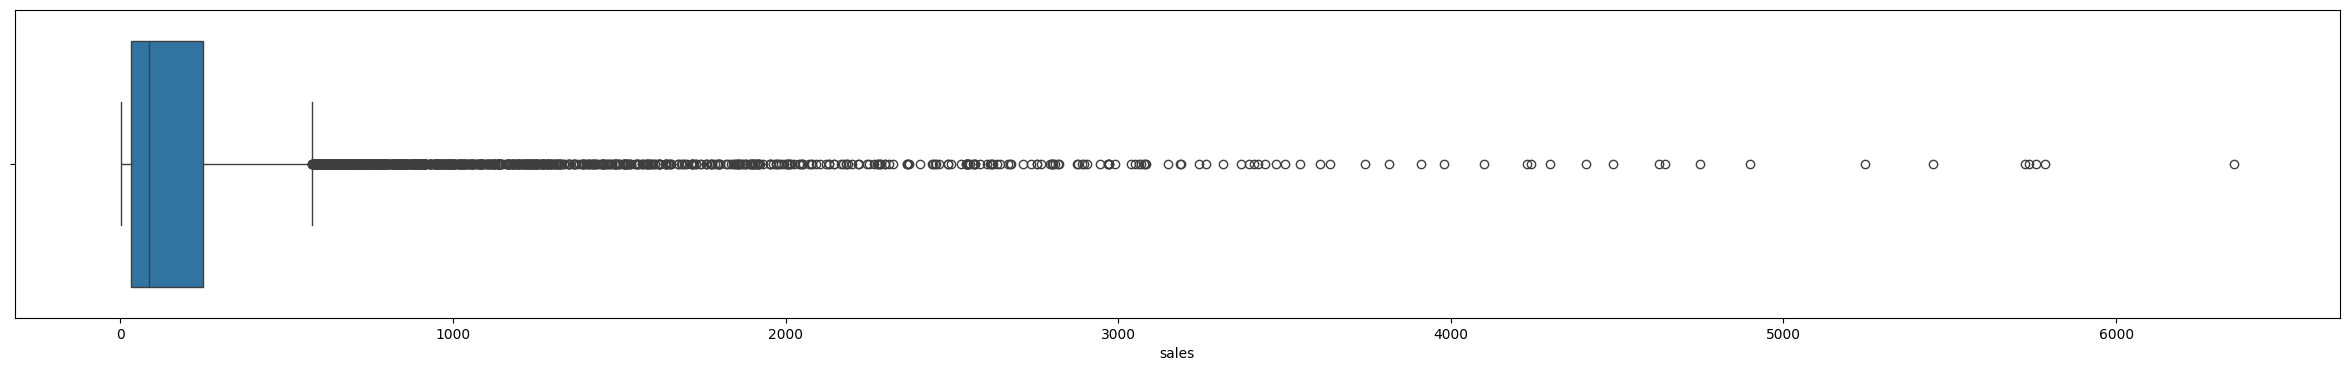

In [108]:
plt.figure(figsize=(30,4))
sns.boxplot(ventas[ventas['year'] == 2012]['sales'], orient='h')

<Axes: xlabel='sales'>

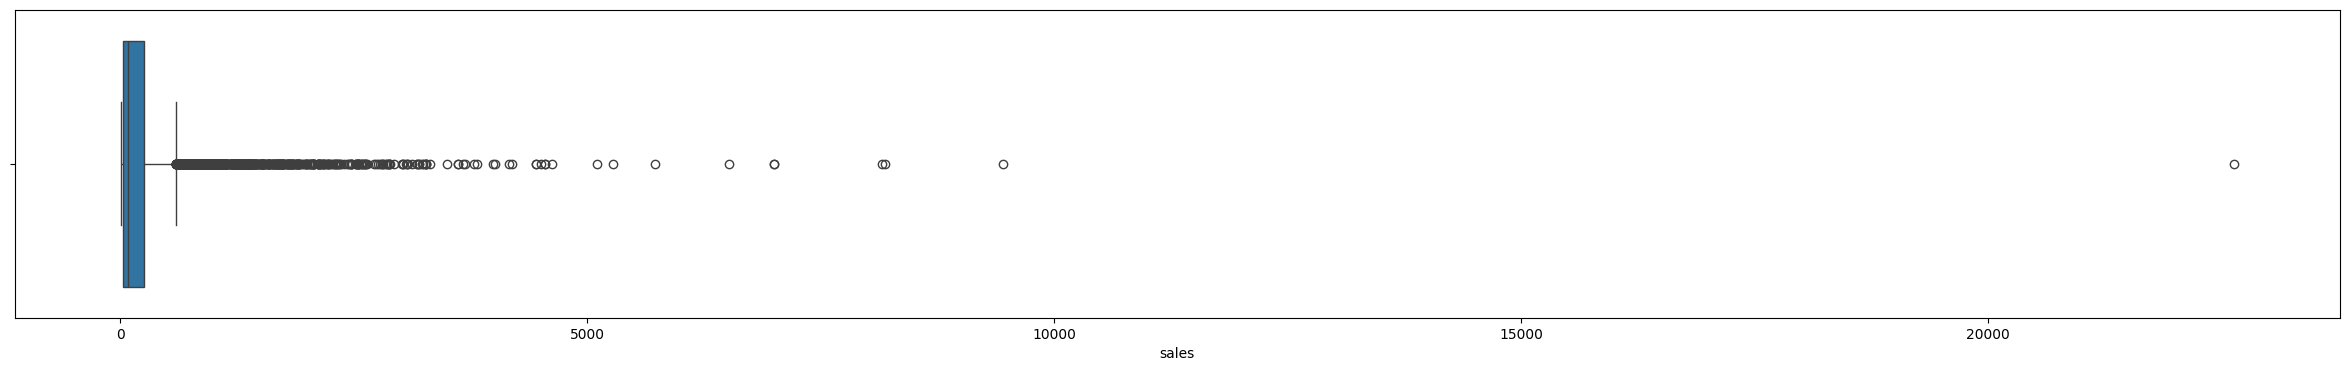

In [109]:
plt.figure(figsize=(30,4))
sns.boxplot(ventas[ventas['year'] == 2011]['sales'], orient='h')

<Axes: xlabel='profit'>

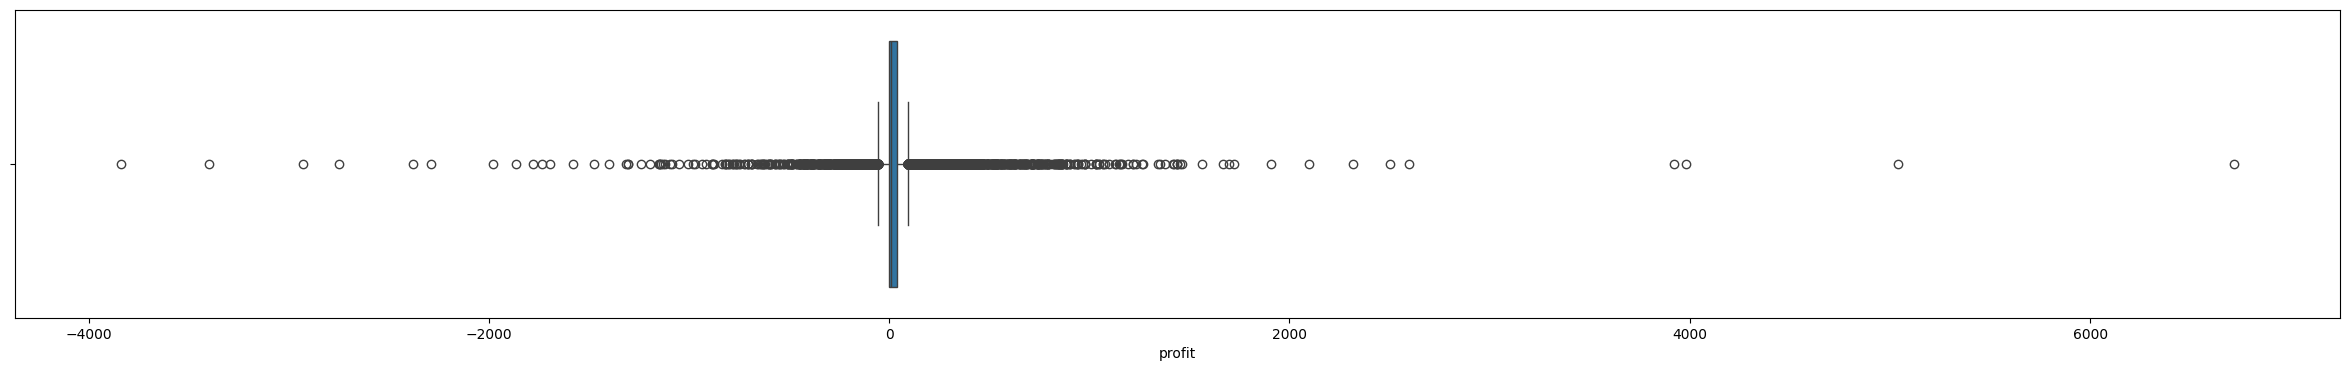

In [110]:
plt.figure(figsize=(30,4))
sns.boxplot(ventas[ventas['year'] == 2014]['profit'], orient='h')

In [111]:
vta_year = ventas.groupby('year', as_index = False)[['sales','profit']].sum()

In [112]:
vta_year

,year,sales,profit
0,2011,2259511,248940.81154
1,2012,2677493,307415.27910
2,2013,3405860,406935.23018
3,2014,4300041,504165.97046


In [113]:
#numero de pedidos
n_pedidos = ventas.groupby(['year'], as_index = False)['order_id'].count()
n_pedidos

,year,order_id
0,2011,8998
1,2012,10962
2,2013,13799
3,2014,17531


In [114]:
#numero de unidades
n_uds = ventas.groupby(['year'], as_index = False)['quantity'].sum()
n_uds

,year,quantity
0,2011,31443
1,2012,38111
2,2013,48136
3,2014,60622


In [195]:
v_kpi = pd.merge(vta_year,n_uds, on = 'year', how = 'outer')
v_kpi2 = pd.merge(v_kpi,n_pedidos, on = 'year', how = 'outer')
v_kpi2.set_index('year',inplace = True)
v_kpi2

,sales,profit,quantity,order_id
year,,,,
2011,2259511,248940.81154,31443,8998
2012,2677493,307415.27910,38111,10962
2013,3405860,406935.23018,48136,13799
2014,4300041,504165.97046,60622,17531


In [196]:
v_kpi2.loc[2011,'order_id']

8998

In [116]:
#calculamos los crecimientos año a año

v_kpi2.pct_change()

,sales,profit,quantity,order_id
year,,,,
2011,NaN,NaN,NaN,NaN
2012,0.184988,0.234893,0.212066,0.218271
2013,0.272033,0.323731,0.263047,0.258803
2014,0.262542,0.238934,0.259390,0.270454


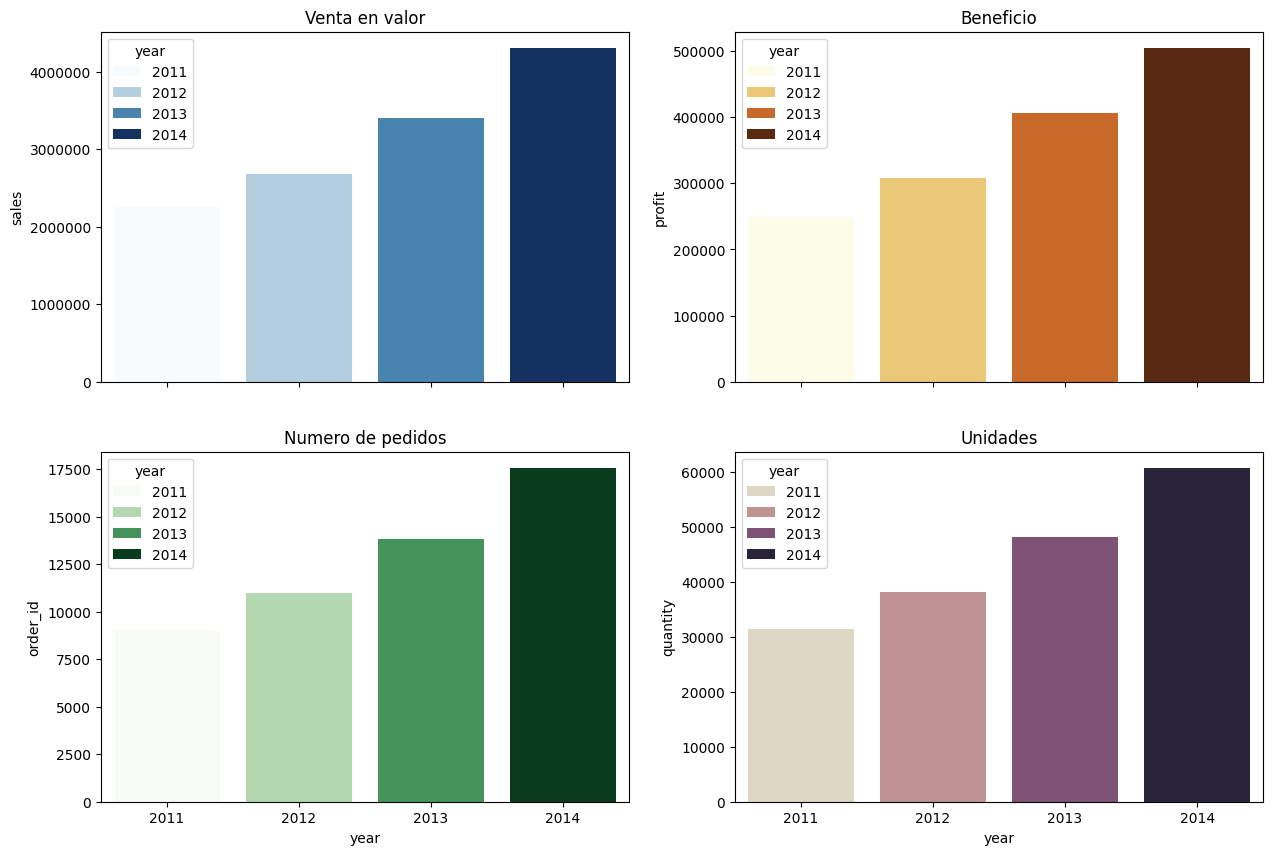

In [117]:
f,ax = plt.subplots(2,2,figsize=(15,10),sharex=True)

sns.barplot(v_kpi2, x = 'year', y = 'sales', hue = 'year', palette = 'Blues', ax=ax[0,0])
sns.barplot(v_kpi2, x = 'year', y = 'profit', hue = 'year', palette = 'YlOrBr', ax=ax[0,1])
sns.barplot(v_kpi2, x = 'year', y = 'order_id', hue = 'year', palette = 'Greens', ax=ax[1,0])
sns.barplot(v_kpi2, x = 'year', y = 'quantity', hue = 'year', palette = 'ch:s=-.2,r=.6',ax=ax[1,1]);

ax[0,0].set_title('Venta en valor')
ax[0,1].set_title('Beneficio')
ax[1,0].set_title('Numero de pedidos')
ax[1,1].set_title('Unidades')


ax[0,0].ticklabel_format(style='plain', axis='y')

In [118]:
# vamos a comprar una empresa papelera y de material de oficina que lleva desde 2011 operando. Nos han dado unos datos y una grafica que a priori parece buena pero vamos a analizar:

    # Venta
        # Vemos a ver nuestra mejor categoria y nuestra peor categoria que se intuye que a pesar de que somos una empresa papelera, en la epoca del formato digital y el email.
        # El pedido medio en unidades es el mismo año a año.
        # El ticket medio por pedido se mantiene igual que el resto de años, y por ende el mix de venta (ver scatter plot por categoria y TTEST).
    ## PODEMOS DECIR QUE EL INCREMENTO DE LA VENTA AÑO TRAS AÑO VIENE POR EL INCREMENTO EN EL NUMERO DE PEDIDOS.

    # Beneficio y descuentos

        # Nuestra mejor y peor categoria en beneficio.
        # El volumen de descuentos es muy elevado año a año y nos lleva a dopar la venta y perder margen (ver correlacion venta-descuento y beneficio-descuento)  
        # porque la categoria de 'tables' tiene un beneficio negativo. El pvp no es correcto y es necesario revisar el pricing o buscar otro proveedor.
        # El margen y el nivel de descuentos se mantienen a lo largo de los años. 


    # Clientes

        # Los clientes del segmento corporate son los que más compran, volumen de pedidos, volumen por pedido, y en beneficio, pero tambien es donde más descuento hacemos.
        # Tengo la venta y el beneficio centralizados en unos pocos clientes, lo demas son clientes residuales (80-20) cumul = True
        # Gano clientes nuevos todos los años. 

    # Envios 

        # He ido incurrriendo en más costes de envio porque tengo mas pedidos. 
        # Y porque tengo más pedidos paises extranjeros.
        # Tengo un grueso de pedidos que son de prioridad critica pero que se expiden con la tarifa "standard class" por lo que tan critical no pueden ser y podria ahorrar costes de manipulacion.

In [119]:
# Somos una empresa mayormente papelera, el grueso de las ventas año a año lo hace la categoria de papel, tanto en beneficio como en volumen.

ventas['category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [120]:
ventas['sub_category'].unique()

array(['Paper', 'Art', 'Storage', 'Appliances', 'Supplies', 'Envelopes',
       'Fasteners', 'Labels', 'Binders', 'Accessories', 'Phones',
       'Copiers', 'Machines', 'Tables', 'Bookcases', 'Chairs',
       'Furnishings'], dtype=object)

In [121]:
v_cat = ventas.groupby(['sub_category','year'],as_index = False)[['sales']].sum().sort_values(by = ['sales'], ascending = False)


In [122]:
v2 = v_cat.groupby(['sub_category', 'year'])['sales'].sum().reset_index()

x2011 = v2[v2['year'] == 2011]
x2012 = v2[v2['year'] == 2012]
x2013 = v2[v2['year'] == 2013]
x2014 = v2[v2['year'] == 2014]

trace1 = go.Bar(x=x2011['sub_category'], y=x2011['sales'],
                name='2011', marker=dict(color='rgba(171,50,96,0.6)'))

trace2 = go.Bar(x=x2012['sub_category'], y=x2012['sales'],
                name='2012', marker=dict(color='rgba(12,50,196,0.6)'))

trace3 = go.Bar(x=x2013['sub_category'], y=x2013['sales'],
                name='2013', marker=dict(color='rgba(80,90,196,0.6)'))

trace4 = go.Bar(x=x2014['sub_category'], y=x2014['sales'],
                name='2014', marker=dict(color='rgba(120,90,96,0.6)'))


data = [trace1, trace2, trace3, trace4]


layout = go.Layout(barmode='group', 
                   title='Ventas por categoría 2011-2014',
                   xaxis=dict(title='Categoría'),
                   yaxis=dict(title='Ventas'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [123]:
#El ticket medio por pedido se mantiene igual que el resto de años, y por ende el mix de venta

t_11= ventas[(ventas['year'] == 2011) & (ventas['sales'] < 5000)].groupby('order_id')['sales'].sum()
t_12= ventas[(ventas['year'] == 2012) & (ventas['sales'] < 3150)].groupby('order_id')['sales'].sum()
t_13 = ventas[(ventas['year'] == 2013) & (ventas['sales'] < 4000)].groupby('order_id')['sales'].sum() #quito los outliers porque me desvirtuan la venta
t_14= ventas[(ventas['year'] == 2014) & (ventas['sales'] < 4000)].groupby('order_id')['sales'].sum()

ttest_ind(t_11,t_12)

TtestResult(statistic=1.1689462517515474, pvalue=0.24245381266259206, df=9768.0)

In [124]:
ttest_ind(t_12,t_13)

TtestResult(statistic=-1.0383695884705089, pvalue=0.29911885911397335, df=12049.0)

In [125]:
ttest_ind(t_13,t_14)

TtestResult(statistic=0.30618505112826555, pvalue=0.7594679353321728, df=15243.0)

In [126]:
# El pedido medio en unidades es el mismo año a año.

u_11= ventas[(ventas['year'] == 2011)].groupby('order_id')['quantity'].sum()
u_12= ventas[(ventas['year'] == 2012)].groupby('order_id')['quantity'].sum()
u_13 = ventas[(ventas['year'] == 2013)].groupby('order_id')['quantity'].sum() #quito los outliers porque me desvirtuan la venta
u_14= ventas[(ventas['year'] == 2014)].groupby('order_id')['quantity'].sum()

In [127]:
ttest_ind(u_11,u_12)

TtestResult(statistic=-0.4130068373199547, pvalue=0.6796106576265579, df=9781.0)

In [128]:
ttest_ind(u_12,u_13)

TtestResult(statistic=-0.2588457415500143, pvalue=0.7957586804406879, df=12062.0)

In [129]:
ttest_ind(u_13,u_14)

TtestResult(statistic=0.5536085186045193, pvalue=0.5798549111777468, df=15250.0)

In [130]:
#pedido medio

v_kpi2['avg_order'] = v_kpi2['sales'] / v_kpi2['order_id']
v_kpi2['avg_order_u'] = v_kpi2['quantity'] / v_kpi2['order_id']

v_kpi2

,sales,profit,quantity,order_id,avg_order,avg_order_u
year,,,,,,
2011,2259511,248940.81154,31443,8998,251.112581,3.494443
2012,2677493,307415.27910,38111,10962,244.252235,3.476647
2013,3405860,406935.23018,48136,13799,246.819335,3.488369
2014,4300041,504165.97046,60622,17531,245.282129,3.457989


In [131]:
# El volumen de descuentos es muy elevado año a año y nos lleva a dopar la venta y perder margen.

# Construimos la columna descuento

ventas['gross_sales'] = (ventas['sales'])/(1-ventas['discount'])
ventas['discount_$'] = ventas['gross_sales']*ventas['discount']



In [132]:
ventas[ventas['year'] == 2011][['discount_$','sales']].corr()

#a mas descuento crece la venta

,discount_$,sales
discount_$,1.000000,0.533147
sales,0.533147,1.000000


In [133]:
ventas[ventas['year'] == 2012][['discount_$','sales']].corr()


,discount_$,sales
discount_$,1.000000,0.333368
sales,0.333368,1.000000


In [134]:
ventas[ventas['year'] == 2013][['discount_$','sales']].corr()


,discount_$,sales
discount_$,1.000000,0.339573
sales,0.339573,1.000000


In [135]:
ventas[ventas['year'] == 2014][['discount_$','sales']].corr()


,discount_$,sales
discount_$,1.000000,0.341648
sales,0.341648,1.000000


In [136]:
ventas[ventas['year'] == 2011][['discount_$','profit']].corr()

#a mas descuento, menos beneficio.


,discount_$,profit
discount_$,1.00000,-0.37127
profit,-0.37127,1.00000


In [137]:
ventas[ventas['year'] == 2012][['discount_$','profit']].corr()

,discount_$,profit
discount_$,1.000000,-0.490037
profit,-0.490037,1.000000


In [138]:
ventas[ventas['year'] == 2013][['discount_$','profit']].corr()

,discount_$,profit
discount_$,1.000000,-0.468464
profit,-0.468464,1.000000


In [139]:
ventas[ventas['year'] == 2014][['discount_$','profit']].corr()

,discount_$,profit
discount_$,1.000000,-0.456099
profit,-0.456099,1.000000


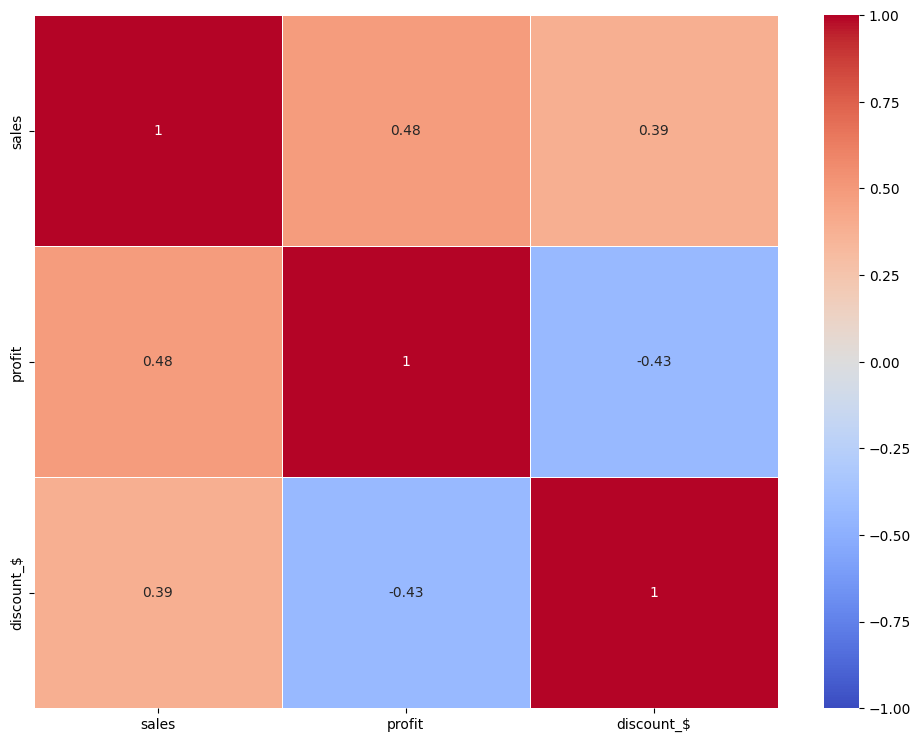

In [140]:
m_corr = ventas[['sales','profit','discount_$']]

plt.figure(figsize=(12,9))
sns.heatmap(m_corr.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5,cmap='coolwarm');

In [141]:
'''CONCLUSION: LOS DESCUENTOS AUMENTAN LA VENTA PERO MATAN EL MARGEN'''
'''deberiamos invertir menos en descuentos, sobretodo haciendo incapié en aquellos donde nos lleva a vender a perdidas, venderiamos menos pero con mas eficiencia'''

'deberiamos invertir menos en descuentos, sobretodo haciendo incapié en aquellos donde nos lleva a vender a perdidas, venderiamos menos pero con mas eficiencia'

In [142]:
p_cat = ventas.groupby(['year', 'sub_category'])[['profit']].sum().sort_values(by = 'profit', ascending = False)
p_cat

profit
year sub_category              
2014 Copiers       104048.53596
2013 Copiers        72300.69118
2014 Phones         70657.64130
     Bookcases      63219.05050
2011 Phones         53927.48950
...                         ...
     Fasteners       1936.91690
2012 Tables         -8421.69860
2011 Tables        -11075.29450
2013 Tables        -14040.48720
2014 Tables        -30545.90840

[68 rows x 1 columns]

In [143]:
# nuestra mejor y peor categoria en cuanto a beneficio

p2 = p_cat.groupby(['sub_category', 'year'])['profit'].sum().reset_index()

x2011 = p2[p2['year'] == 2011]
x2012 = p2[p2['year'] == 2012]
x2013 = p2[p2['year'] == 2013]
x2014 = p2[p2['year'] == 2014]

# Crear los trazos para cada año
trace1 = go.Bar(x=x2011['sub_category'], y=x2011['profit'],
                name='2011', marker=dict(color='rgba(171,50,96,0.6)'))

trace2 = go.Bar(x=x2012['sub_category'], y=x2012['profit'],
                name='2012', marker=dict(color='rgba(12,50,196,0.6)'))

trace3 = go.Bar(x=x2013['sub_category'], y=x2013['profit'],
                name='2013', marker=dict(color='rgba(80,90,196,0.6)'))

trace4 = go.Bar(x=x2014['sub_category'], y=x2014['profit'],
                name='2014', marker=dict(color='rgba(120,90,96,0.6)'))

# Crear la lista de datos incluyendo todos los trazos
data = [trace1, trace2, trace3, trace4]

# Configurar el layout con modo de barra apilada
layout = go.Layout(barmode='group',  # Cambia 'overlay' a 'group' para apilar las barras
                   title='Beneficio por categoría 2011-2014',
                   xaxis=dict(title='Categoría'),
                   yaxis=dict(title='Beneficio'))

# Crear y mostrar la figura
fig = go.Figure(data=data, layout=layout)
fig.show()

In [144]:
ventas.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum', 'gross_sales',
       'discount_$'],
      dtype='object')

In [145]:
# Porque tables tiene un beneficio negativo
neg = ventas[(ventas['sub_category'] == 'Tables') & (ventas['profit'] < 0)].groupby(['year'])[['gross_sales','profit','discount_$','row_id']].agg({'gross_sales':'sum','profit':'sum','discount_$':'sum','row_id':'count'})


In [146]:
pos = ventas[(ventas['sub_category'] == 'Tables') & (ventas['profit'] > 0)].groupby(['year'])[['gross_sales','profit','discount_$','row_id']].agg({'gross_sales':'sum','profit':'sum','discount_$':'sum','row_id':'count'})

In [147]:
mesas = pd.merge(neg,pos, left_index= True, right_index= True, how = 'outer', suffixes= ['_neg','_pos'])
mesas['discount_%_neg'] = mesas['discount_$_neg']/ mesas['gross_sales_neg'] 
mesas['discount_%_pos'] = mesas['discount_$_pos']/ mesas['gross_sales_pos']   
mesas

,gross_sales_neg,profit_neg,discount_$_neg,row_id_neg,gross_sales_pos,profit_pos,discount_$_pos,row_id_pos,discount_%_neg,discount_%_pos
year,,,,,,,,,,
2011,115707.411313,-27148.5888,49764.411313,100,91087.644689,16073.2943,9902.644689,70,0.430088,0.108716
2012,122882.504801,-27619.6444,55488.504801,93,103414.637363,19197.9458,8569.637363,70,0.451557,0.082867
2013,160796.569430,-35072.1556,71585.569430,131,125766.261369,21031.6684,14805.261369,101,0.445193,0.117720
2014,218963.974919,-54282.7598,97844.974919,172,135941.825397,23736.8514,13600.825397,119,0.446854,0.100049


In [148]:
#porque el resto de categorias no

resto_neg = ventas[(ventas['sub_category'] != 'Tables') & (ventas['profit'] < 0)].groupby(['year'])[['gross_sales','profit','discount_$','row_id']].agg({'gross_sales':'sum','profit':'sum','discount_$':'sum','row_id':'count'})
resto_pos = ventas[(ventas['sub_category'] != 'Tables') & (ventas['profit'] > 0)].groupby(['year'])[['gross_sales','profit','discount_$','row_id']].agg({'gross_sales':'sum','profit':'sum','discount_$':'sum','row_id':'count'})
resto = pd.merge(resto_neg,resto_pos, left_index= True, right_index= True, how = 'outer', suffixes= ['_neg','_pos'])

In [149]:
resto

,gross_sales_neg,profit_neg,discount_$_neg,row_id_neg,gross_sales_pos,profit_pos,discount_$_pos,row_id_pos
year,,,,,,,,
2011,7.125142e+05,-142159.56772,302180.220428,2122,1.775598e+06,402175.67376,98207.851566,6586
2012,7.648422e+05,-167722.69646,309768.199759,2596,2.136749e+06,483559.67416,109986.029994,8072
2013,9.562654e+05,-210835.03222,390377.361246,3191,2.736015e+06,631810.74960,141809.157123,10183
2014,1.210572e+06,-255805.71072,495484.756370,4139,3.476680e+06,790517.58958,184217.309493,12877


In [150]:
resto['discount_%_neg'] = resto['discount_$_neg'] / resto['gross_sales_neg']
resto['discount_%_pos'] = resto['discount_$_pos'] / resto['gross_sales_pos']

In [151]:
resto

,gross_sales_neg,profit_neg,discount_$_neg,row_id_neg,gross_sales_pos,profit_pos,discount_$_pos,row_id_pos,discount_%_neg,discount_%_pos
year,,,,,,,,,,
2011,7.125142e+05,-142159.56772,302180.220428,2122,1.775598e+06,402175.67376,98207.851566,6586,0.424104,0.055310
2012,7.648422e+05,-167722.69646,309768.199759,2596,2.136749e+06,483559.67416,109986.029994,8072,0.405009,0.051474
2013,9.562654e+05,-210835.03222,390377.361246,3191,2.736015e+06,631810.74960,141809.157123,10183,0.408231,0.051831
2014,1.210572e+06,-255805.71072,495484.756370,4139,3.476680e+06,790517.58958,184217.309493,12877,0.409298,0.052987


In [152]:
#calculamos todo el beneficio negativo

ventas[ventas['profit'] < 0]['profit'].sum()

-920646.1557200002

In [153]:
#calculamos cuanto podriamos ganar vendiendo a coste (sin los descuentos tan agresivos)
#calculamos la columna coste

ventas['cost'] = ventas['sales'] + ventas['profit']

venta_coste = ventas[ventas['profit'] < 0].groupby(['year'])[['sales','cost']].sum()

venta_coste

,sales,cost
year,,
2011,476277,306968.84348
2012,522468,327125.65914
2013,655099,409191.81218
2014,836206,526117.52948


In [154]:
'''La categoria de mesas no tiene un punto de precio adecuado, porque al mismo descuento medio y margen incurrimos en perdidas. Deberiamos hacer una politica de pricing o si el precio es acorde buscar un proveedor que me de precios de coste mejores'''

'La categoria de mesas no tiene un punto de precio adecuado, porque al mismo descuento medio y margen incurrimos en perdidas. Deberiamos hacer una politica de pricing o si el precio es acorde buscar un proveedor que me de precios de coste mejores'

In [184]:
# descuentos: donde están. 

perdidas_11 = ventas[(ventas['profit'] < 0) & (ventas['year'] == 2011)]['product_name'].unique()
perdidas_12 = ventas[(ventas['profit'] < 0) & (ventas['year'] == 2012)]['product_name'].unique()
perdidas_13 = ventas[(ventas['profit'] < 0) & (ventas['year'] == 2013)]['product_name'].unique()
perdidas_14 = ventas[(ventas['profit'] < 0) & (ventas['year'] == 2014)]['product_name'].unique()



In [186]:
perdidas_11

1441

In [187]:
perdidas_12

1569

In [174]:
perdidas_13

1726

In [158]:
perdidas_14

array(['Nokia Office Telephone, with Caller ID', 'Okidata Printer, Red',
       'StarTech Inkjet, Durable', ...,
       'Novimex Swivel Fabric Task Chair',
       'Anderson Hickey Conga Table Tops & Accessories',
       'Shocksock Galaxy S4 Armband'], dtype=object)

In [189]:
#comunes a los 4 arrays

com_1 = np.intersect1d(perdidas_11,perdidas_12)
com_2 = np.intersect1d(com_1,perdidas_13)
com_3 = np.intersect1d(com_2,perdidas_14)

len(com_3)

len(ventas['product_name'].unique())

#575 referencias todos los años de 3788, todos los años aparecen:
#2011:
nuevas_11 = len(perdidas_11) - len(com_3)
nuevas_12 = len(perdidas_12) - len(com_3)
nuevas_13 = len(perdidas_13) - len(com_3)
nuevas_14 = len(perdidas_14) - len(com_3)

print(nuevas_11,nuevas_12,nuevas_13,nuevas_14)

866 994 1151 1414


In [ ]:
# Los clientes del segmento corporate son los que más compran, volumen de pedidos, volumen por pedido, y en beneficio.

cluster = ventas.groupby(['segment'], as_index = False)[['sales','profit','quantity','discount']].sum()
cluster['margen'] = cluster['profit'] / cluster['sales'] 
cluster

,segment,sales,profit,quantity,discount,margen
0,Consumer,6508141,749239.78206,92157,3808.042,0.115123
1,Corporate,3824808,441208.32866,53565,2205.284,0.115354
2,Home Office,2309956,277009.18056,32590,1316.402,0.119920


In [ ]:
# Tengo la venta y el beneficio centralizados en unos pocos clientes, lo demas son clientes residuales (80-20) cumul = True

clientes_v = ventas['clientes']
clientes_v


customer_name
Aaron Bergman         24646
Aaron Hawkins         20759
Aaron Smayling        14207
Adam Bellavance       20189
Adam Hart             21720
                      ...  
Xylona Preis          12202
Yana Sorensen         20034
Yoseph Carroll        20165
Zuschuss Carroll      28485
Zuschuss Donatelli    12434
Name: sales, Length: 795, dtype: int64

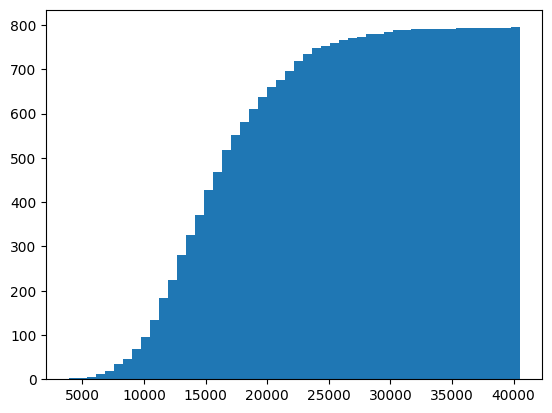

In [ ]:

fig, ax = plt.subplots()
ax.hist(clientes_v, bins = 50, cumulative = True);

In [191]:
# Gano clientes nuevos todos los años. NO GANO CLIENTES NUEVOS TODOS LOS AÑOS. PODRIAMOS CAPTAR NUEVOS CLIENTES Y GANAR MAS DINERO

n_cus_11 = len(ventas[ventas['year'] == 2011]['customer_name'].unique())


In [192]:
n_cus_12 = len(ventas[ventas['year'] == 2012]['customer_name'].unique())

In [193]:
n_cus_13 = len(ventas[ventas['year'] == 2013]['customer_name'].unique())

In [190]:
n_cus_14 = len(ventas[ventas['year'] == 2014]['customer_name'].unique())

In [211]:
#tasa media de repeticion

tasa_11 = (v_kpi2.loc[2011,'order_id']) / n_cus_11
tasa_12 = (v_kpi2.loc[2012,'order_id']) / n_cus_12
tasa_13 = (v_kpi2.loc[2013,'order_id']) / n_cus_13
tasa_14 =(v_kpi2.loc[2014,'order_id']) / n_cus_14

print(tasa_11,tasa_12,tasa_13,tasa_14)

tasa = pd.DataFrame(data = {'year': [2011,2012,2013,2014],
'no_clientes' : [n_cus_11,n_cus_12,n_cus_13,n_cus_14],
'tasa_rep': [tasa_11,tasa_12,tasa_13,tasa_14]})
tasa


11.318238993710692 13.788679245283019 17.357232704402517 22.079345088161208


,year,no_clientes,tasa_rep
0,2011,795,11.318239
1,2012,795,13.788679
2,2013,795,17.357233
3,2014,794,22.079345


<Axes: xlabel='year', ylabel='no_clientes'>

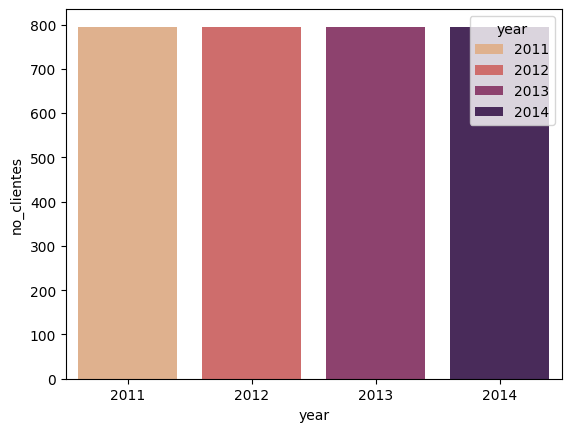

In [212]:
sns.barplot(tasa, x = 'year', y = 'no_clientes', hue = 'year', palette = 'flare')